# m6A targets (mESC)

Download from: m6A RNA Modification Controls Cell Fate Transition in Mammalian Embryonic Stem Cells, Cell Stem Cell

In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [9]:
dat1 = pd.read_csv("../../1_FLAIRseq/reports/halflife_of_mESC_400uM_3h.2TC.tsv", sep="\t", index_col=0)
dat1 = dat1[dat1["GeneType"] == "protein_coding"]
dat1 = dat1[dat1["Total"] >= 10]
dat1 = dat1[(dat1["T"] > 0.5) & (dat1["T"] < 32)]
print("NanoNASC-seq genes: %d" % len(dat1))

NanoNASC-seq genes: 6143


In [10]:
dat2 = pd.read_excel("data/m6A_targets_in_mESC_mm9.xlsx")
targets = set(dat2["Gene Symbol"])
len(targets)

d1 = dat1[[gname in targets for gname in dat1["GeneName"]]]
d2 = dat1[[gname not in targets for gname in dat1["GeneName"]]]
print("m6A targets:", len(d1))
print("No m6A targets:", len(d2))

m6A targets: 2789
No m6A targets: 3354


/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


2789 1.4490028322621673
3354 3.0
7.863385765991862e-143


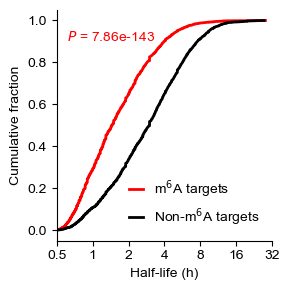

In [11]:
def get_xy(vs):
    vs = list(sorted(vs))
    xs = vs
    ys = np.arange(len(xs)) / len(xs)
    return xs, ys
print(len(d1["T"]), np.median(d1["T"]))
print(len(d2["T"]), np.median(d2["T"]))

xs1, ys1 = get_xy(np.log2(d1["T"]))
xs2, ys2 = get_xy(np.log2(d2["T"]))
p = ks_2samp(xs1, xs2)[1]
print(p)

vmin, vmax = -1, 5
plt.figure(figsize=(3, 3))
plt.plot(xs1, ys1, color="red", lw=2, label="m$^6$A targets")
plt.plot(xs2, ys2, color="black", lw=2, label="Non-m$^6$A targets")
plt.text(vmin + (vmax - vmin) * 0.05, 0.9, "$P$ = %.2e" % p, color="red")
plt.xlabel("Half-life (h)")
plt.ylabel("Cumulative fraction")
xs = np.arange(vmin, vmax + 1)
plt.xticks(xs, [str(2**int(x)) for x in xs])
plt.xlim(vmin, vmax)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig("figures/benchmark_halflife_mESC_m6a_target.pdf")

In [5]:
dat2 = pd.read_excel("data/m6A_targets_in_mESC_mm9.xlsx")
targets = set(dat2["Gene Symbol"])
m6a_positions = defaultdict(list)
for gene, pos in dat2[["Gene Symbol", "Position"]].values:
    m6a_positions[gene].append(pos)
targets1 = set()
for k, v in m6a_positions.items():
    if len(v) == 1 and v[0] == "5UTR":
        targets1.add(k)
targets2 = set()
for k, v in m6a_positions.items():
    if len(v) == 1 and v[0] == "CDS":
        targets2.add(k)
targets3 = set()
for k, v in m6a_positions.items():
    if len(v) == 1 and v[0] == "3UTR":
        targets3.add(k)
print(len(targets), len(targets1), len(targets2), len(targets3))

d1 = dat1[dat1["GeneName"].isin(targets1)]
d2 = dat1[dat1["GeneName"].isin(targets2)]
d3 = dat1[dat1["GeneName"].isin(targets3)]
d4 = dat1[~dat1["GeneName"].isin(targets)]

params = [
    ["5UTR", d1],
    ["CDS", d2],
    ["3UTR", d3],
    ["NoTarget", d4]
]

for name, d in params:
    print("Name: %s, Genes: %s, Median half-life: %f" %(name, len(d), np.median(d["T"])))

5578 46 591 761
Name: 5UTR, Genes: 30, Median half-life: 1.457705
Name: CDS, Genes: 249, Median half-life: 1.261293
Name: 3UTR, Genes: 439, Median half-life: 1.988054
Name: NoTarget, Genes: 3354, Median half-life: 3.000000


/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
for i in range(len(params) - 1):
    for j in range(i + 1, len(params)):
        print("%s vs. %s: %.2e" % (params[i][0], params[j][0], ks_2samp(np.log2(params[i][1]["T"]), np.log2(params[j][1]["T"]))[1]))

5UTR vs. CDS: 6.33e-01
5UTR vs. 3UTR: 2.29e-01
5UTR vs. NoTarget: 6.68e-04
CDS vs. 3UTR: 2.40e-07
CDS vs. NoTarget: 4.45e-27
3UTR vs. NoTarget: 7.74e-20


0.0006675100854625995 4.446353196025334e-27 7.736286271782826e-20


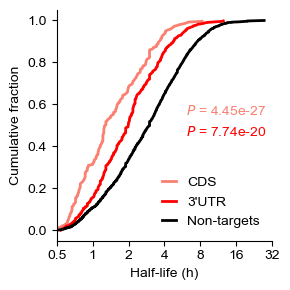

In [7]:
xs1, ys1 = get_xy(np.log2(d1["T"]))
xs2, ys2 = get_xy(np.log2(d2["T"]))
xs3, ys3 = get_xy(np.log2(d3["T"]))
xs4, ys4 = get_xy(np.log2(d4["T"]))

p1 = ks_2samp(xs1, xs4)[1]
p2 = ks_2samp(xs2, xs4)[1]
p3 = ks_2samp(xs3, xs4)[1]
print(p1, p2, p3)

vmin, vmax = -1, 5
plt.figure(figsize=(3, 3))
#plt.plot(xs1, ys1, color="grey", lw=2, label="5'UTR")
plt.plot(xs2, ys2, color="salmon", lw=2, label="CDS")
plt.plot(xs3, ys3, color="red", lw=2, label="3'UTR")
plt.plot(xs4, ys4, color="black", lw=2, label="Non-targets")
#plt.text(vmin + (vmax - vmin) * 0.6, 0.65, "p = %.2e" % p1, color="grey")
plt.text(vmin + (vmax - vmin) * 0.6, 0.55, "$P$ = %.2e" % p2, color="salmon")
plt.text(vmin + (vmax - vmin) * 0.6, 0.45, "$P$ = %.2e" % p3, color="red")

plt.xlabel("Half-life (h)")
plt.ylabel("Cumulative fraction")
xs = np.arange(vmin, vmax + 1)
plt.xticks(xs, [str(2**int(x)) for x in xs])
plt.xlim(vmin, vmax)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig("figures/benchmark_halflife_mESC_m6a_target_detail.pdf")